<a href="https://colab.research.google.com/github/YYEg/MAD/blob/main/LEVIN_LAB4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
!pip install factor_analyzer

In [22]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy as sp
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, LabelEncoder
import factor_analyzer

Подгружаем данные

In [23]:
df = pd.read_csv('/content/drive/MyDrive/LevinMAD/penguins.csv')
print(df.describe())

       Unnamed: 0  bill_length_mm  bill_depth_mm  flipper_length_mm  \
count  344.000000      342.000000     342.000000         342.000000   
mean   172.500000       43.921930      17.151170         200.915205   
std     99.448479        5.459584       1.974793          14.061714   
min      1.000000       32.100000      13.100000         172.000000   
25%     86.750000       39.225000      15.600000         190.000000   
50%    172.500000       44.450000      17.300000         197.000000   
75%    258.250000       48.500000      18.700000         213.000000   
max    344.000000       59.600000      21.500000         231.000000   

       body_mass_g         year  
count   342.000000   344.000000  
mean   4201.754386  2008.029070  
std     801.954536     0.818356  
min    2700.000000  2007.000000  
25%    3550.000000  2007.000000  
50%    4050.000000  2008.000000  
75%    4750.000000  2009.000000  
max    6300.000000  2009.000000  


Ищем пустые значения, удаляем их

In [24]:
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

Unnamed: 0 - 0%
species - 0%
island - 0%
bill_length_mm - 1%
bill_depth_mm - 1%
flipper_length_mm - 1%
body_mass_g - 1%
sex - 3%
year - 0%


In [25]:
df = df.dropna(axis=0, how='any')

In [26]:
df = df.drop('island', axis=1)
df = df.drop('species', axis=1)
df = df.drop('sex', axis=1)

In [27]:
df = df.drop('Unnamed: 0', axis=1)

In [28]:
Segment = df.pop('year')
scaler = StandardScaler()
df_t = pd.DataFrame(scaler.fit_transform(df))
df_t.describe()

,0,1,2,3
count,3.330000e+02,3.330000e+02,3.330000e+02,3.330000e+02
mean,-1.024206e-15,-1.280257e-15,2.560514e-16,-1.280257e-16
std,1.001505e+00,1.001505e+00,1.001505e+00,1.001505e+00
min,-2.177987e+00,-2.067291e+00,-2.069852e+00,-1.874435e+00
25%,-8.227879e-01,-7.958519e-01,-7.836512e-01,-8.172292e-01
50%,9.288742e-02,6.872642e-02,-2.834620e-01,-1.953432e-01
75%,8.437412e-01,7.807321e-01,8.598276e-01,7.063915e-01
max,2.858227e+00,2.204743e+00,2.146028e+00,2.603144e+00


                   bill_length_mm  bill_depth_mm  flipper_length_mm  \
bill_length_mm           1.000000      -0.228626           0.653096   
bill_depth_mm           -0.228626       1.000000          -0.577792   
flipper_length_mm        0.653096      -0.577792           1.000000   
body_mass_g              0.589451      -0.472016           0.872979   

                   body_mass_g  
bill_length_mm        0.589451  
bill_depth_mm        -0.472016  
flipper_length_mm     0.872979  
body_mass_g           1.000000  


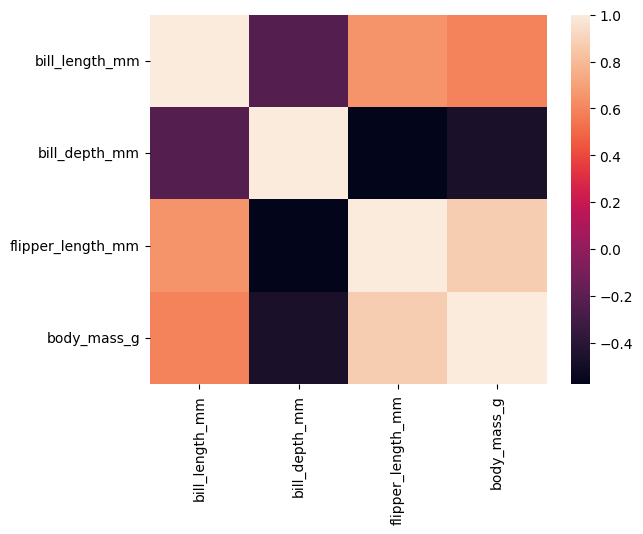

In [29]:
print(df.corr())
sns.heatmap(df.corr())
plt.show()

[[-1.85359302  0.03206938 -0.23490166  0.52839663]
 [-1.31625406 -0.44352677 -0.02747008  0.40172663]
 [-1.37660509 -0.16123048  0.18968926 -0.5286619 ]
 ...
 [-0.36788976  0.99107962  0.8879961   0.19586257]
 [ 0.4923596   1.48484928  0.32995979 -0.55085906]
 [-0.21341684  1.2615538   0.76596669 -0.10823334]]
              0             1             2             3
0  1.000000e+00 -4.073318e-16 -3.514039e-16  3.190224e-17
1 -4.073318e-16  1.000000e+00  2.680538e-16  2.740551e-16
2 -3.514039e-16  2.680538e-16  1.000000e+00 -7.484837e-17
3  3.190224e-17  2.740551e-16 -7.484837e-17  1.000000e+00
Количество главных компонент: 2
[0.68633893 0.19452929 0.09216063 0.02697115]


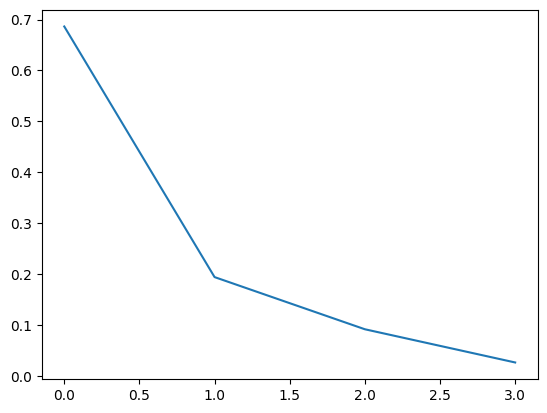

In [31]:
pca = PCA(n_components = 4) #Анализ основных компонент
pca.fit(df_t)
pca_var = pca.explained_variance_ratio_ #Линейное уменьшение размерности с использованием разложения данных по сингулярным значениям для
#их проецирования в пространство меньшей размерности.
#Входные данные центрируются, но не масштабируются для каждого объекта.
cumsum_var = np.cumsum(pca_var)
n_components = np.argmax(cumsum_var >= 0.8) + 1 #argmax - Возвращает индексы максимальных значений вдоль оси.

m = pca.fit_transform(df_t)
print(m)
df_tsss = pd.DataFrame(scaler.fit_transform(m))
print(df_tsss.corr())


print('Количество главных компонент:', n_components)
print(pca_var)

plt.plot(range(0, df_t.shape[1]), pca_var) # Создает график объясненной дисперсии для каждой главной компоненты.
plt.show()

[0.68633893 0.19452929]


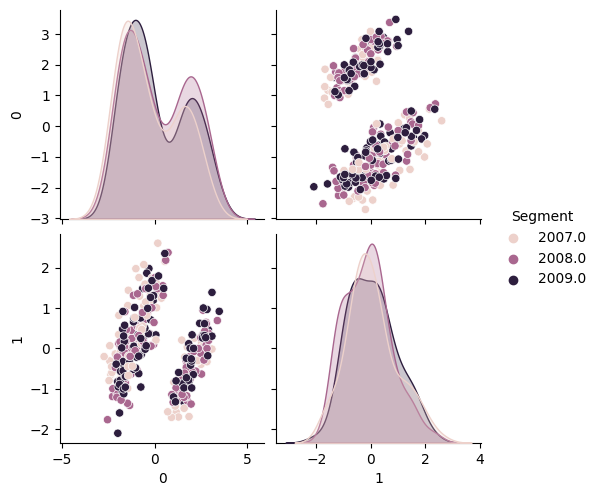

In [33]:
pca = PCA(n_components=2)
pc = pca.fit_transform(df_t)
pc=pd.DataFrame(pc)
pc['Segment'] = Segment
sns.pairplot(pc, hue='Segment')
v=pca.explained_variance_ratio_
print(v)
plt.show()

[[ 0.64168024  0.29643718]
 [-0.60483541  0.53800686]
 [ 0.99642446  0.04624716]
 [ 0.8713651   0.10226014]]
[0.49962853 0.65527725 0.9950005  0.76973428]
[0.50037147 0.34472275 0.0049995  0.23026572]


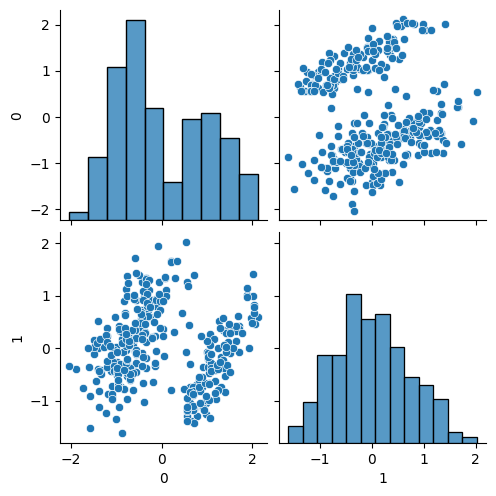

In [34]:
fa=factor_analyzer.FactorAnalyzer(n_factors=2, rotation=None)
scaler = StandardScaler()
aps_reduced=scaler.fit_transform(df_t)
fa.fit(aps_reduced)
loads=fa.loadings_
print(loads) #матрица нагрузок
print(fa. get_communalities()) #матрица общностей
print(fa.get_uniquenesses()) #матрица уникальностей
pfa = fa.transform(df_t)
pfa = pd.DataFrame(pfa)
sns.pairplot(pfa)

[[ 0.69998633  0.09822255]
 [-0.2171909  -0.7798111 ]
 [ 0.86276076  0.50064396]
 [ 0.78794899  0.38583762]]
[0.49962853 0.65527724 0.9950005  0.76973428]
[0.50037147 0.34472276 0.0049995  0.23026572]


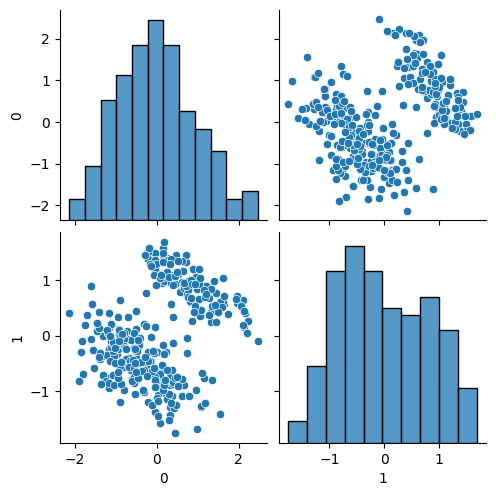

In [35]:
fa = factor_analyzer.FactorAnalyzer(n_factors=2, rotation='varimax')
fa.fit(df_t)
loads=fa.loadings_
print(loads)
print(fa.get_communalities())
print(fa.get_uniquenesses())
pfa = fa.transform(df_t)
pfa = pd.DataFrame(pfa)
sns.pairplot(pfa)